In [1]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from typing import TypedDict
import os
load_dotenv()

True

In [2]:
groq_api_key=os.getenv("GROQ_API_KEY")
model = ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")

In [3]:
class blog_state(TypedDict):
    topic:str
    outline:str
    content:str

In [ ]:
def create_outline(state : blog_state) -> blog_state :
    topic = state['topic']
    prompt = f'Write outline for a blog on topic {topic}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state



In [ ]:
# def create_blog (state : blog_state) ->blog_state :
#     topic = state['topic']
#     outline = state['outline']
#     prompt = f'write blog on topic {topic} with outline /n {outline}'
#     content = model.invoke(prompt).content
#     state['content']= content
#     return state

In [22]:
def create_blog(state: blog_state) -> blog_state:

    topic = state['topic']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {topic} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [23]:
graph = StateGraph(blog_state)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow = graph.compile()

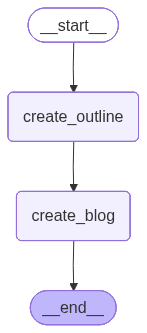

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [24]:
workflow.invoke({'topic':'Evolution of GPU'})

{'topic': 'Evolution of GPU',
 'outline': 'Here\'s an outline for a blog on the evolution of GPU:\n\n**Title:** "The Evolution of GPUs: From Simple Graphics to Complex Computing"\n\n**I. Introduction**\n\n* Brief overview of the importance of GPUs in modern computing\n* Historical context: early days of GPU development\n* Thesis statement: The evolution of GPUs has been a remarkable journey, transforming from simple graphics accelerators to powerful computing engines.\n\n**II. The Early Days (1970s-1980s)**\n\n* Introduction of the first graphics processing units (GPUs) in the 1970s\n* Development of the first graphics processing units (GPUs) by companies like SGI and Sun Microsystems\n* Early applications: graphics rendering and CAD design\n\n**III. The 2D Graphics Era (1990s)**\n\n* Introduction of 2D graphics accelerators (e.g., NVIDIA\'s RIVA 128)\n* Advancements in 2D graphics performance and efficiency\n* Early games and applications that leveraged 2D graphics acceleration\n\n**I